In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns[:2]

Index(['UDI', 'Product ID'], dtype='object')

In [7]:
df.drop(df.columns[:2] , axis = 1, inplace = True)

In [8]:
cat_cols = df.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Type', 'Failure Type']

In [9]:
for col in cat_cols :
    print(df[col].value_counts())

L    6000
M    2997
H    1003
Name: Type, dtype: int64
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [10]:
df_f = df[df.Target == 1]
df_f['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [11]:
df_f[df_f['Failure Type'] == 'No Failure']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [12]:
df_f[df_f['Failure Type'] == 'No Failure'].index

Int64Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [13]:
idx = df_f[df_f['Failure Type'] == 'No Failure'].index

In [14]:
df.drop(idx , axis =0 , inplace = True )

In [15]:
df_f = df[df.Target == 0]
df_f['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [16]:
idx = df_f[df_f['Failure Type'] == 'Random Failures'].index
df.drop(idx , axis =0 , inplace = True )

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   object 
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 701.2+ KB


In [18]:
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
for i , col in enumerate(num_cols,1):
    print(i , col)

1 Air temperature [K]
2 Process temperature [K]
3 Rotational speed [rpm]
4 Torque [Nm]
5 Tool wear [min]
6 Target


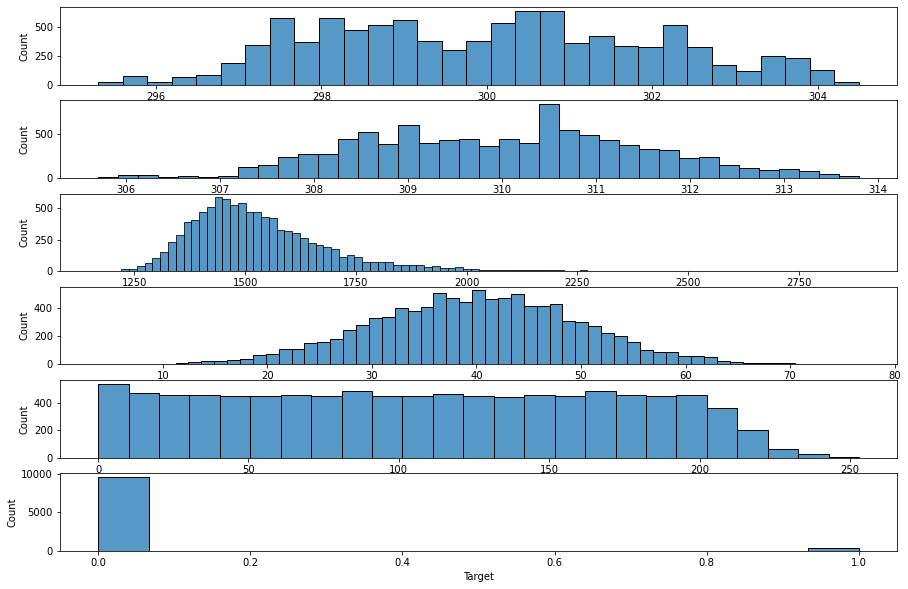

In [21]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(6,1,i)
    sns.histplot(data = df , x= col)

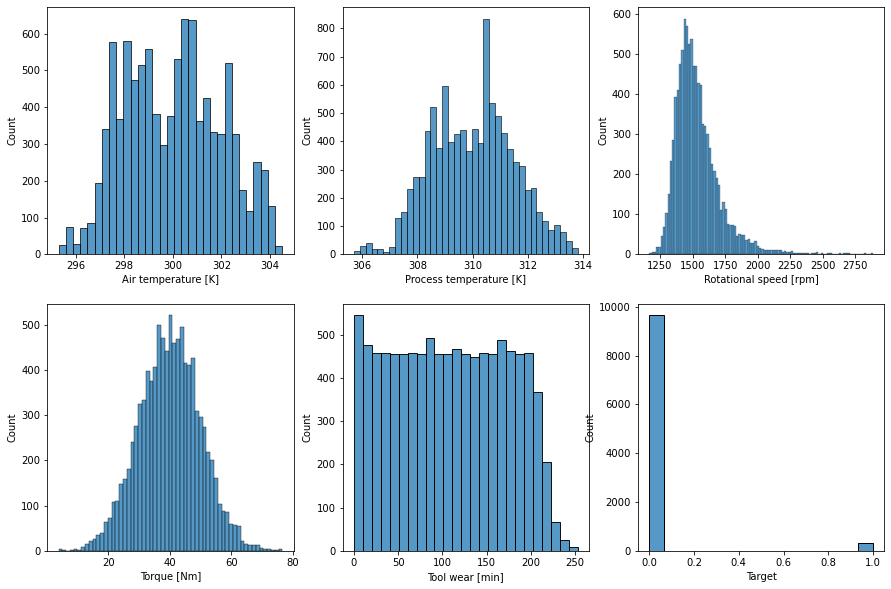

In [22]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data = df , x= col)

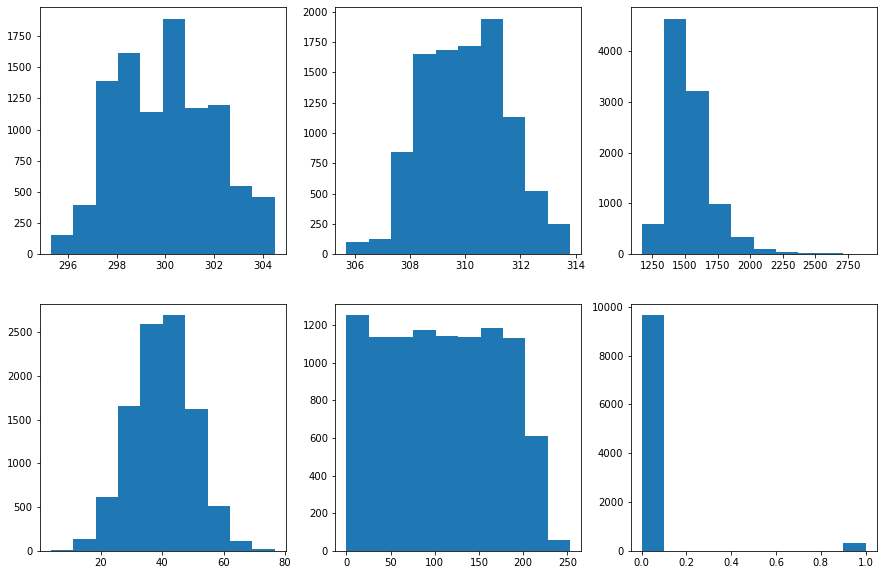

In [23]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    plt.hist(data = df , x= col)

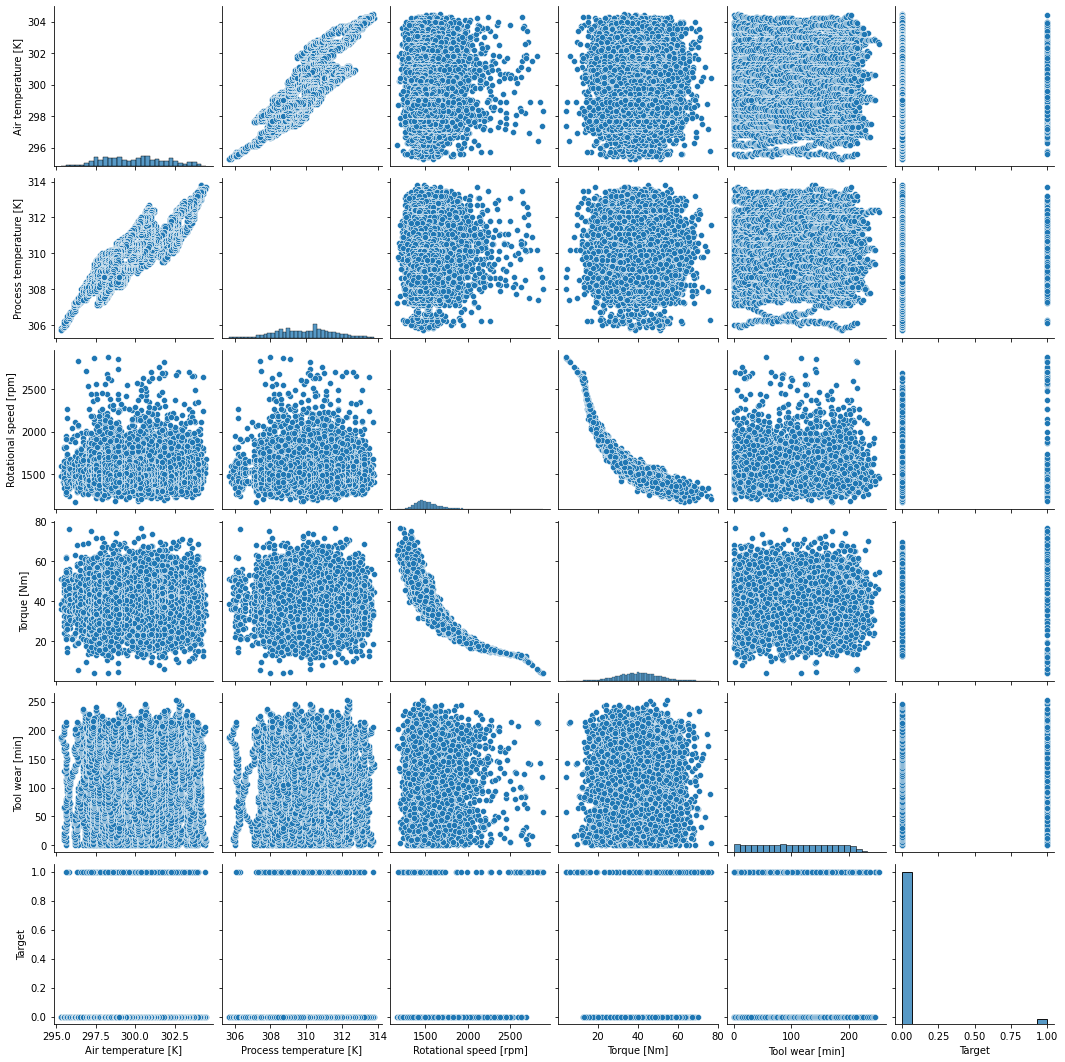

In [24]:
sns.pairplot(df)

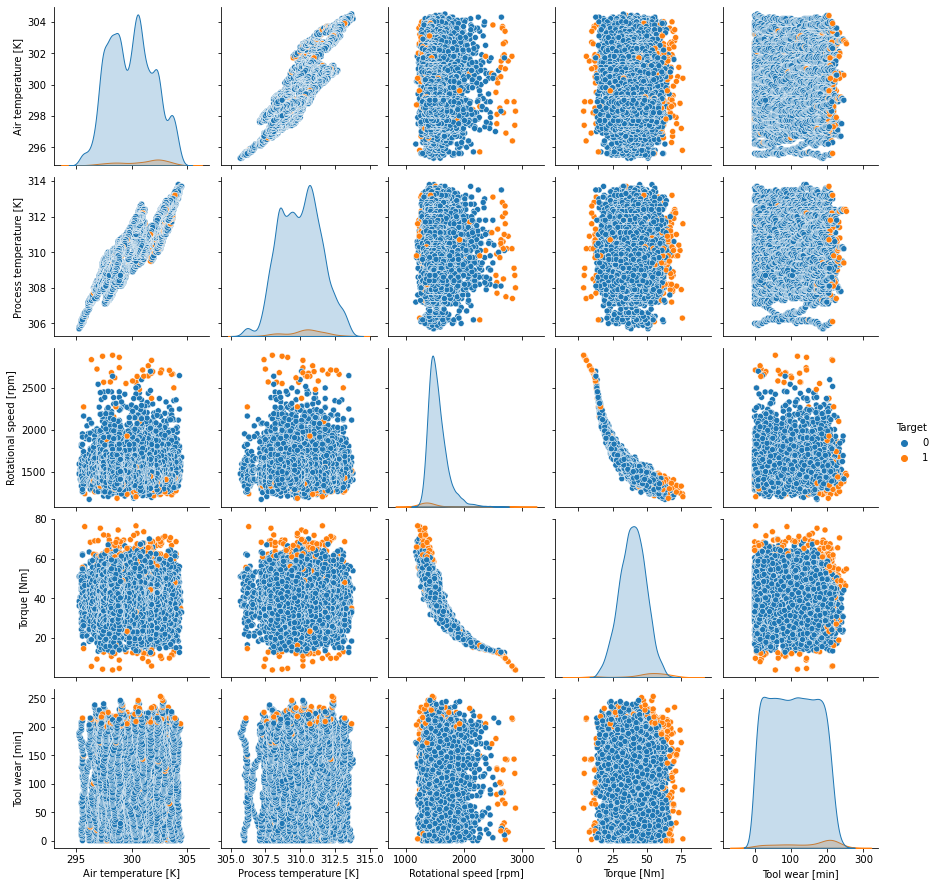

In [25]:
sns.pairplot(df , hue = 'Target')

In [26]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [27]:
df.columns[-2:]

Index(['Target', 'Failure Type'], dtype='object')

In [28]:
x = df.drop(df.columns[-2:] , axis = 1 )
y = df['Target']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [30]:
cat_cols = X_train.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Type']

In [31]:
num_cols = X_train.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
enc = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

ct = ColumnTransformer(
    [
        ('encoding' , enc , cat_cols ) ,
        ('scaling' , sc , num_cols)
    ]
)

In [33]:
x_train = ct.fit_transform(X_train)
x_test = ct.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train , y_train)
clf.score(x_test , y_test)

0.9744835965978129

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix
clfpred=clf.predict(x_test)
accuracy_score(y_test,clfpred)


0.9744835965978129

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train)
svc.score(x_test , y_test)

0.9778250303766707

In [36]:
from sklearn.svm import SVC
rsvc = SVC(kernel = 'rbf')
rsvc.fit(x_train , y_train)
rsvc.score(x_test , y_test)

0.9778250303766707

In [37]:
y.value_counts()

0    9643
1     330
Name: Target, dtype: int64

In [38]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier()
rclf.fit(x_train,y_train)
rclf.score(x_test,y_test)

0.9839003645200486

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [45]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()
dectree.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
decpred=dectree.predict(x_test)
accuracy_score(y_test,decpred)

0.9835965978128797